# reading data

In [1]:
import pandas as pd

In [2]:
data_path='training.1600000.processed.noemoticon.csv'
df=pd.read_csv(data_path,encoding = 'latin1',on_bad_lines='skip')
print("The dataset has %d rows and %d columns." %df.shape)

The dataset has 1048572 rows and 6 columns.


# Data Preprocessing

In [3]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Features selection


In [4]:
df.columns

Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')

In [5]:
df=df.iloc[:,[0,5]]
df.head()

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [6]:
#renaming columns for simplicity
df.columns=['sentiment','text']
df.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


### checking for missing values


In [7]:
print("There are " + ("some" if df.isna().values.any() else "no")  + " null/missing values in the dataset.")

There are no null/missing values in the dataset.


In [8]:
#checking sentiment unique values
df['sentiment'].unique()

array([0, 4], dtype=int64)

In [9]:
#replacing sentiments values to 0 for negative, and 1 for positive
df['sentiment']=df['sentiment'].replace(4,1)
df['sentiment'].unique()

array([0, 1], dtype=int64)

# Data Cleaning

In [48]:
from nltk.corpus import stopwords
cachedStopWords=stopwords.words('english')

#function to clean text
def clean_text(text):
    import re
    
    #converting text to lower case
    text=text.lower()
    
    #removing mentions
    text=re.sub(r'@[A-Za-z0-9]+',' ',text)
    
    #removing URLs
    text=re.sub(r'https?:\/\/\S+',' ',text)
    
    #removing Hashtags
    text=re.sub(r'#','',text)
    
    #tokenization
    token_txt=text.split()
    
    
    #stemming
    from nltk.stem.porter import PorterStemmer
    stemmer=PorterStemmer()

    stem_text= [stemmer.stem(w) for w in token_txt] 

    text=" ".join([w for w in stem_text ])

    
    #removing special characters 
    text=re.sub(r'\W+',' ',text)
    
    #removing digits
    text=re.sub(r'\d+','',text)
    
    #removing short words
    text=" ".join([w for w in text.split() if len(w)>2])
    
    return text

In [49]:
df['cleaned_txt']=df['text'].apply(clean_text)

In [50]:
df.head()

,sentiment,text,cleaned_txt
0,0,is upset that he can't update his Facebook by ...,upset that can updat facebook text and might c...
1,0,@Kenichan I dived many times for the ball. Man...,dive mani time for the ball manag save the res...
2,0,my whole body feels itchy and like its on fire,whole bodi feel itchi and like fire
3,0,"@nationwideclass no, it's not behaving at all....",not behav all mad whi here becaus can see you ...
4,0,@Kwesidei not the whole crew,not the whole crew


# Exploratory Data Analysis

In [51]:
#required libraries
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [52]:
#fuction to visualize most frequent words in class
def one_word_freq(data,name=""):
    
    #get each word frequency
    data_freq=WordCloud().process_text(data)

    #create dataframe for each word with its count
    data_freq_df=pd.DataFrame({'word':data_freq.keys(),'count':data_freq.values()})

    #sort the words decending by it count value
    data_freq_df=data_freq_df.sort_values(by='count',ascending=False)

    data_freq_df.reset_index(inplace=True)
    
    
    print("*************************************************************************************")
    print(f"Visualize top 20 frequent words used in {name}")
    plt.figure(figsize = (15,10))
    sns.barplot(x = data_freq_df.loc[:20,'word'], y = data_freq_df.loc[:20,'count'])
    plt.title('word frequency in real data')
    plt.show()
    

### Word count

In [53]:
#storing all the negative data sentences together 
neg_data=' '.join([sentence for sentence in df['cleaned_txt'][df['sentiment']==0]])

#storing all the positive data sentences together 
pos_data=' '.join([sentence for sentence in df['cleaned_txt'][df['sentiment']==1]])

*************************************************************************************
Word Cloud For positive data 


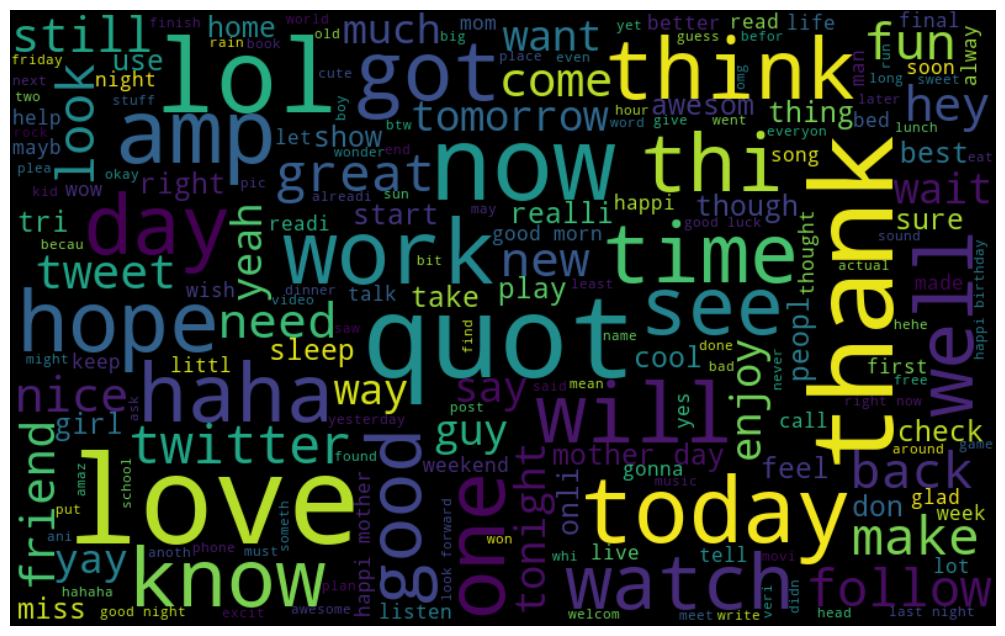

In [54]:
#Word Cloud for positive data

wordcloud=WordCloud(width=800,height=500,random_state=0,max_font_size=100).generate(pos_data)

print("*************************************************************************************")
print('Word Cloud For positive data ')
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

*************************************************************************************
Word Cloud For negative data 


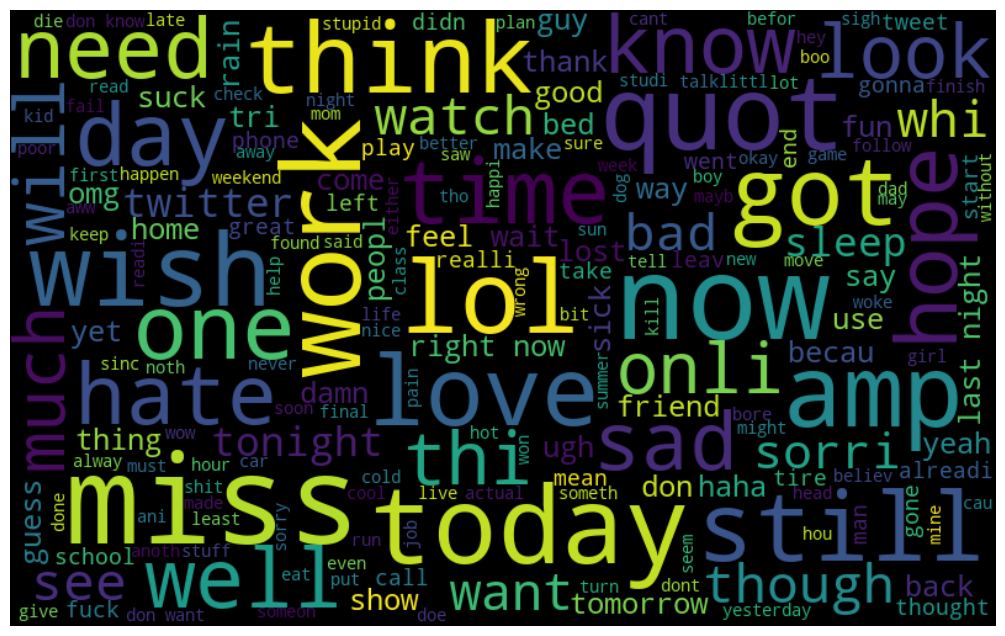

In [55]:
#Word Cloud for negative data

wordcloud=WordCloud(width=800,height=500,random_state=0,max_font_size=100).generate(neg_data)

print("*************************************************************************************")
print('Word Cloud For negative data ')
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


### Inference:

##### positive data has words like nice, friend, great, fun, right, haha, cool
##### negative data has words like miss, wish, sad, hate, bad, mean, suck
#### there're some of mutuals words between the two classes like lol, one, love, look, well, twitter, hope
*********************************************************************************************************************

### One Word Count

*************************************************************************************
Visualize top 20 frequent words used in positive data


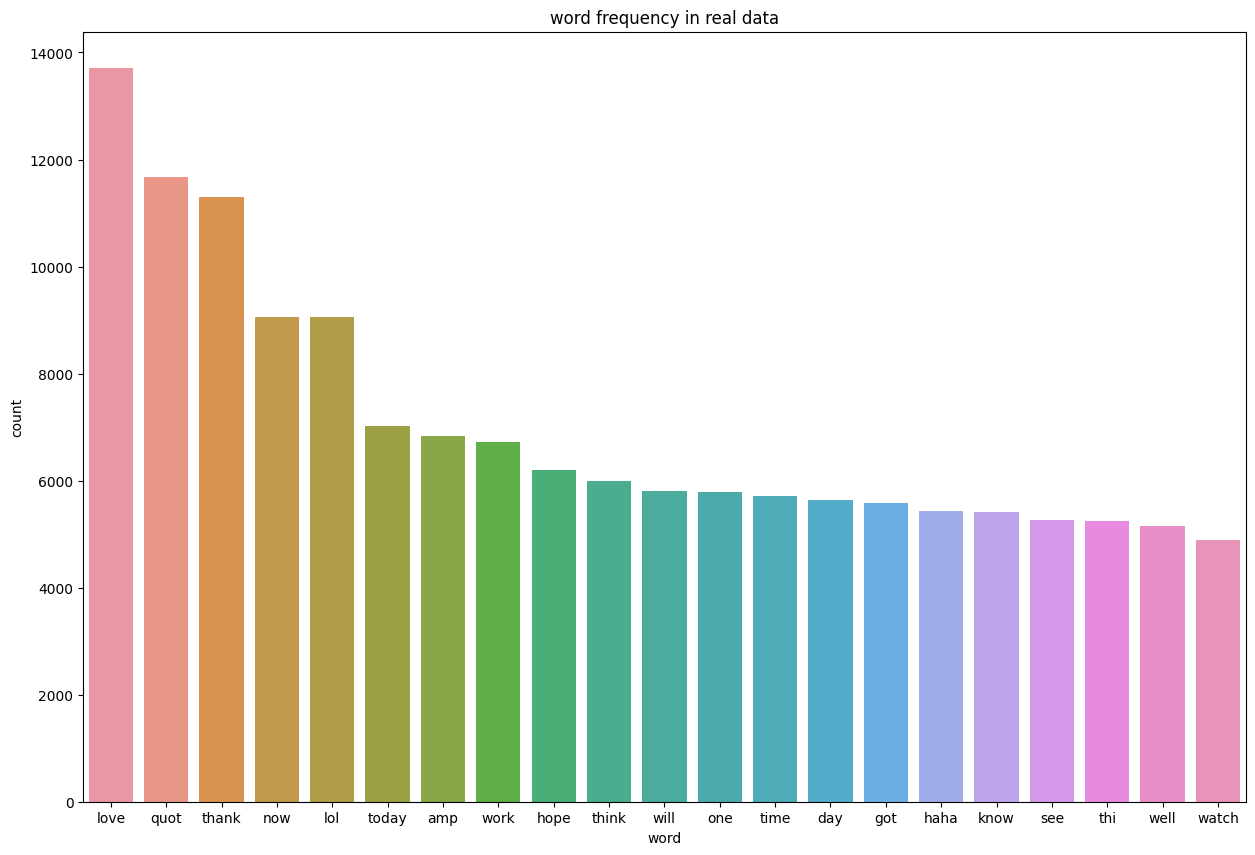

In [56]:
#one word count for positive data
one_word_freq(pos_data,"positive data")

*************************************************************************************
Visualize top 20 frequent words used in negative data


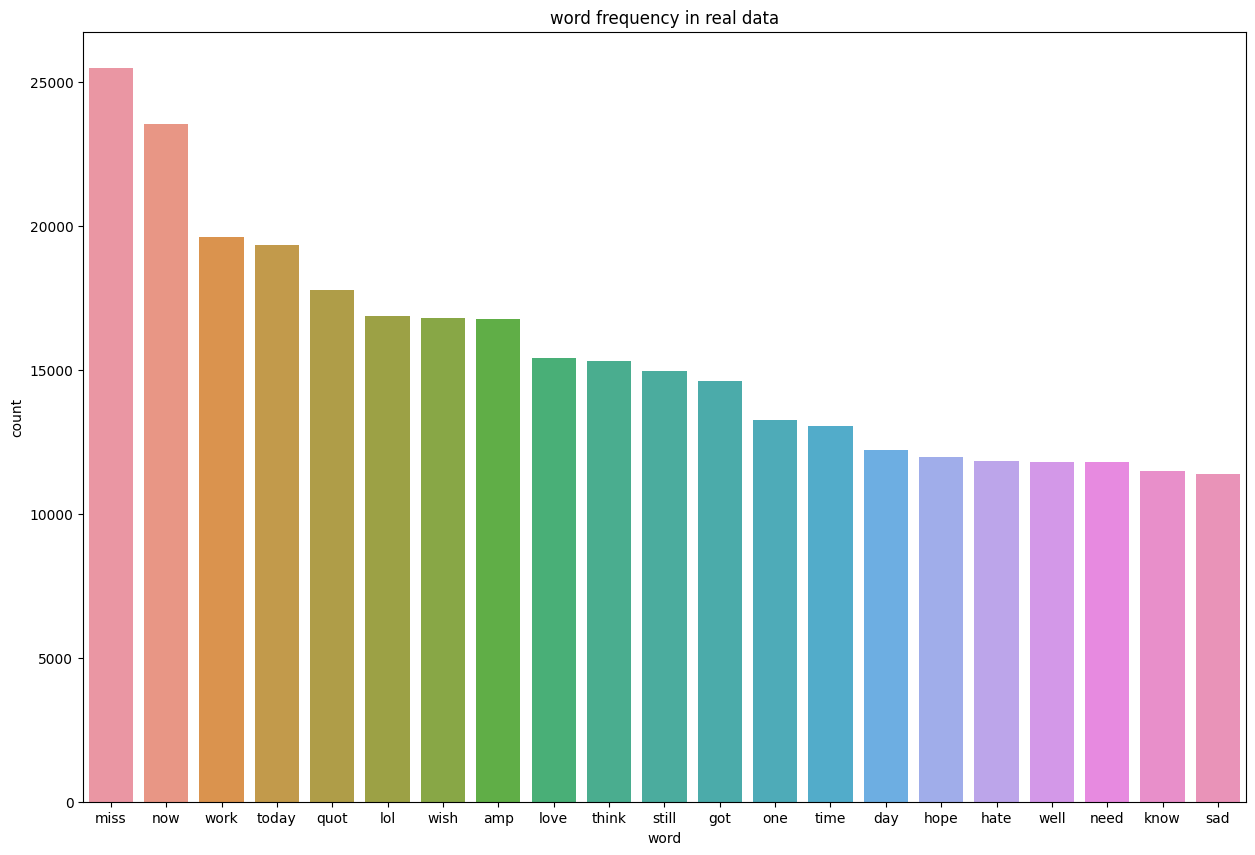

In [57]:
#one word count for negative data
one_word_freq(neg_data,"negative data")

#### Inference:

##### positive data has frequent words like love, quot, thank, haha, well, good
##### negative data has frequent words like quot, amp, miss, lol, think, hate
*********************************************************************************************************************

### Checking the dataset balance

<AxesSubplot: >

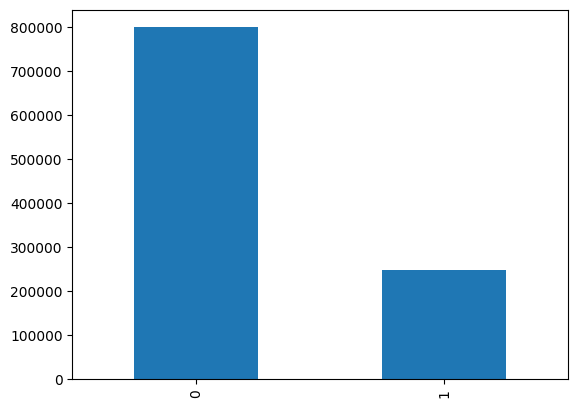

In [58]:
#visualize sentiment classes count
df['sentiment'].value_counts().plot(kind='bar')

#### Inference:

##### we can see that data is unbalanced and class 0(majority class) has more values than class 1(minority class).
##### we need to rebalance data to give equal priority to each class
*********************************************************************************************************************


In [59]:
#class count
class_0_count,class_1_count=df['sentiment'].value_counts()
print(f'class 0 count is {class_0_count} and class 1 count is {class_1_count}')

#divide by class
class_0=df[df['sentiment']==0]
class_1=df[df['sentiment']==1]

class 0 count is 799996 and class 1 count is 248576


### Oversample the data

In [60]:
#rebalance data by oversampling the minority class (class_1)
class_1_oversampled=class_1.sample(class_0_count,replace=True)
class_1_oversampled.shape

(799996, 3)

In [61]:
#concating the oversampled class with the other class
df_oversampled=pd.concat([class_0,class_1_oversampled],axis=0)
df_oversampled.shape

(1599992, 3)

<AxesSubplot: >

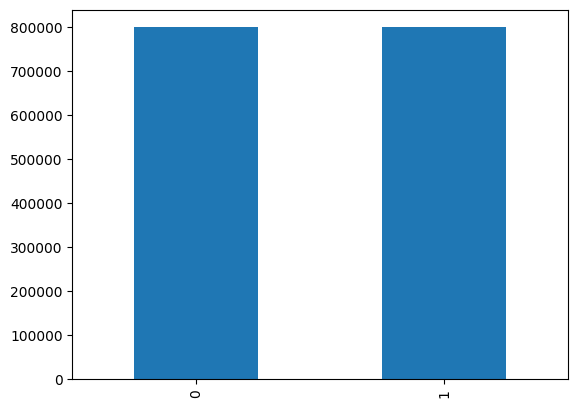

In [62]:
#visualize sentiment classes count after oversampling
df_oversampled['sentiment'].value_counts().plot(kind='bar')

# dataset split

In [63]:
#required libraries
from sklearn.model_selection import train_test_split

X=df_oversampled['cleaned_txt'].astype(str)
y=df_oversampled['sentiment']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.33,stratify=y)

# Feature Extraction

In [71]:
#required libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Setting up Term Frequency - Inverse Document Frequency Vectorizer
vectorizer = TfidfVectorizer( ngram_range = (1,3))

# Fit and transform training and testing sets 
tf_X_train=vectorizer.fit_transform(X_train)
tf_X_test=vectorizer.transform(X_test)

# Model training and evaluation


In [72]:
#required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

#Evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

import warnings
warnings.filterwarnings('ignore')

In [73]:
#datafrome to store models details
models_df=pd.DataFrame(columns=['train_acc','test_acc','f1-score'])

def train_model(model_name,model,X_train=tf_X_train,y_train=y_train,X_test=tf_X_test,y_test=y_test):
    #train model on train data
    model.fit(X_train,y_train)
    
    #prediction over trian data
    y_train_pred = model.predict(X_train)
    
    #prediction over test data
    y_test_pred = model.predict(X_test)
    
    #train accuracy using accuracy score metric
    train_acc=round(accuracy_score(y_train,y_train_pred),2)*100
    print("training accuracy = ",train_acc)

    
    #test accuracy using accuracy score metric
    test_acc=round(accuracy_score(y_test,y_test_pred),2)*100
    print("testing accuracy = ",test_acc)
    
    #f1-score
    f1_s=round(f1_score(y_test, y_test_pred),2)*100
    print("f1-score = ",f1_s)

    #evaluate model using confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
    plt.show()
    print(classification_report(y_test,y_test_pred))
    
    #adding the model details to models data frame
    models_df.loc[model_name]=[train_acc,test_acc,f1_s]



### MultiNomial Naive Bayes model

training accuracy =  96.0
testing accuracy =  88.0
f1-score =  89.0


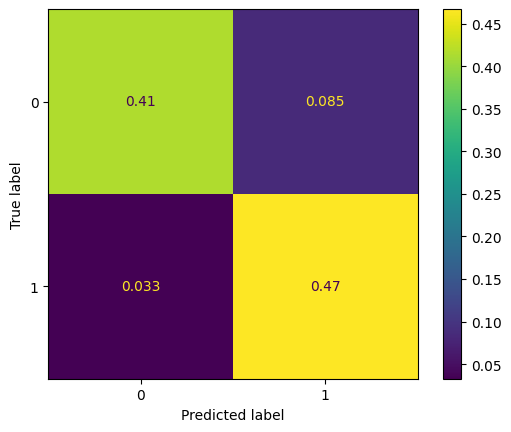

              precision    recall  f1-score   support

           0       0.93      0.83      0.88    263999
           1       0.85      0.93      0.89    263999

    accuracy                           0.88    527998
   macro avg       0.89      0.88      0.88    527998
weighted avg       0.89      0.88      0.88    527998



In [74]:
NB = MultinomialNB()
train_model('MultiNomial Naive Bayes',NB)

### Linear Support Vector model

training accuracy =  99.0
testing accuracy =  92.0
f1-score =  92.0


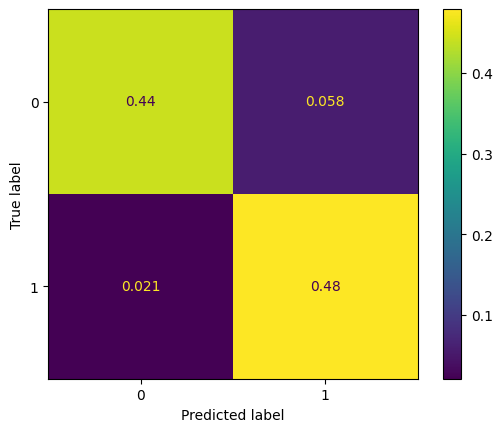

              precision    recall  f1-score   support

           0       0.95      0.88      0.92    263999
           1       0.89      0.96      0.92    263999

    accuracy                           0.92    527998
   macro avg       0.92      0.92      0.92    527998
weighted avg       0.92      0.92      0.92    527998



In [75]:
svc = LinearSVC()
train_model('SVC',svc)

### Logistic Regression model

training accuracy =  91.0
testing accuracy =  86.0
f1-score =  86.0


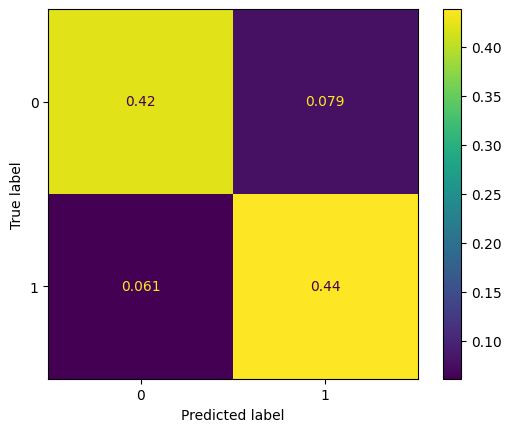

              precision    recall  f1-score   support

           0       0.87      0.84      0.86    263999
           1       0.85      0.88      0.86    263999

    accuracy                           0.86    527998
   macro avg       0.86      0.86      0.86    527998
weighted avg       0.86      0.86      0.86    527998



In [76]:
lr=LogisticRegression()
train_model('logistic regression',lr)

### Comparing Models Performance

In [77]:
models_df.sort_values(by='test_acc',ascending=False,inplace=True)
models_df

,train_acc,test_acc,f1-score
SVC,99.0,92.0,92.0
MultiNomial Naive Bayes,96.0,88.0,89.0
logistic regression,91.0,86.0,86.0


#### Inference:

##### we can see that Linear Support Vector model has the best performance over all the used models with a testing accuracy of 92% 
*********************************************************************************************************************
